In [23]:
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from IPython.display import Audio
import torch
import torchaudio
from torch.utils.data import Dataset
import torchaudio.transforms as T
import random
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing

In [6]:
# Paths for data.
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

- - Loading RAVDESS dataset labels: Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)

In [7]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

/tmp/ipykernel_37/800787859.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


- CREMA dataset

In [18]:
Audio("/kaggle/input/cremad/AudioWAV/1001_DFA_HAP_XX.wav")

In [19]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


- TESS dataset

In [21]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


- SURREY dataset
The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'su' = 'surprise'

In [26]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
1,fear,/kaggle/input/surrey-audiovisual-expressed-emo...
2,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...


- Combine all datasets together

In [28]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [26]:
data_path = pd.read_csv('/kaggle/input/ser-data-combined/data_path.csv')
# Encode the labels
label_encoder = LabelEncoder()
data_path['Emotions'] = label_encoder.fit_transform(data_path['Emotions'])
classes = label_encoder.classes_
inv_label = label_encoder.inverse_transform

In [27]:
data_path.head()

,Emotions,Path
0,7,/kaggle/input/ravdess-emotional-speech-audio/a...
1,5,/kaggle/input/ravdess-emotional-speech-audio/a...
2,2,/kaggle/input/ravdess-emotional-speech-audio/a...
3,2,/kaggle/input/ravdess-emotional-speech-audio/a...
4,5,/kaggle/input/ravdess-emotional-speech-audio/a...


# Data Visualization and Exploration

- Viewing labels and their frequency

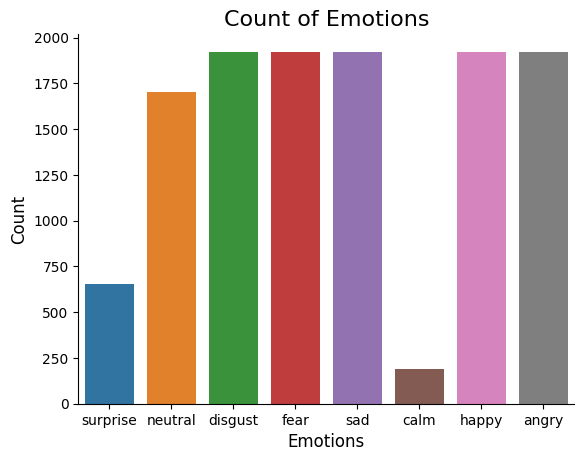

In [30]:
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

`Waveplots` and `Spectrograms`
- Waveplots: Shows how an audio signal varies over time. The height of the waveform at any given point represents the amplitude of the sound wave at that time. Amplitude is related to the volume of the sound i.e the higher the amplitude, the louder the sound. Hence, waveplots allows you to see the structure of the sound, such as when it gets louder or quieter, and when different parts of the sound occur.

- Spectrograms: Natural sounds (like speech, music, or noise) are usually complex, meaning they are not just a single pure tone (which would appear as a single line in a spectrogram) but a combination of many frequencies. Spectrograms show frequencies present in the signal. The color intensity shows the amplitude at each frequency and time point, indicating which frequencies are most prominent at different times i.e it will show more intense colors across the frequency bands where the sound is strongest. Quiet sounds would have darker colors, indicating that the energy in the sound is much lower while loud sounds would have bright colors across the relevant frequency bands, showing the strong presence of energy across a range of frequencies.

In [42]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

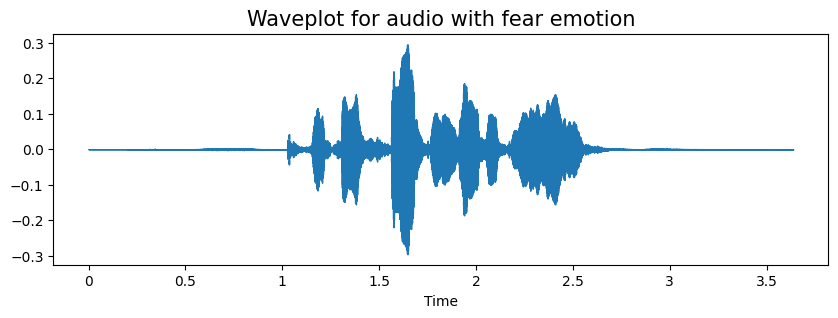

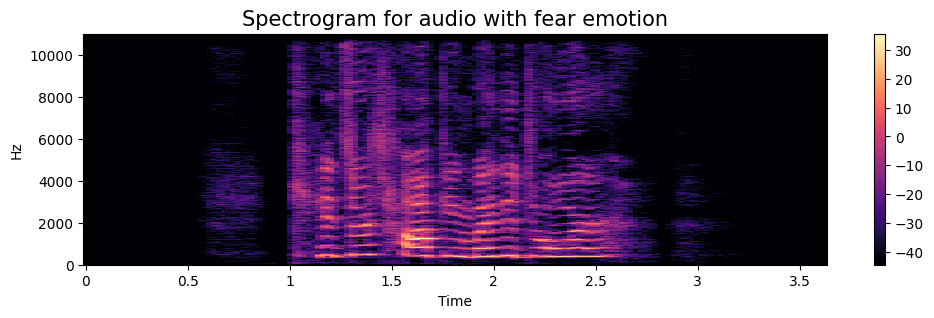

In [59]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

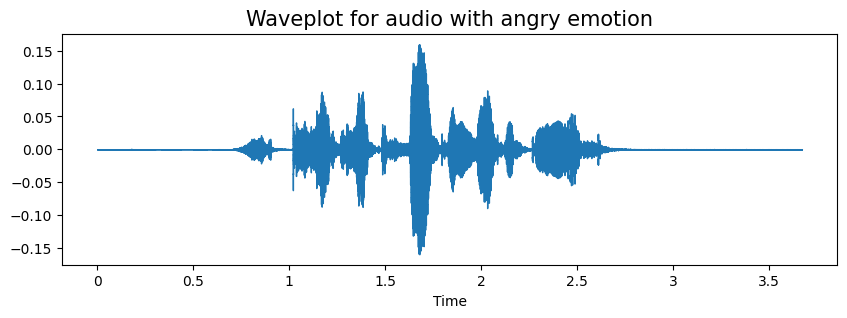

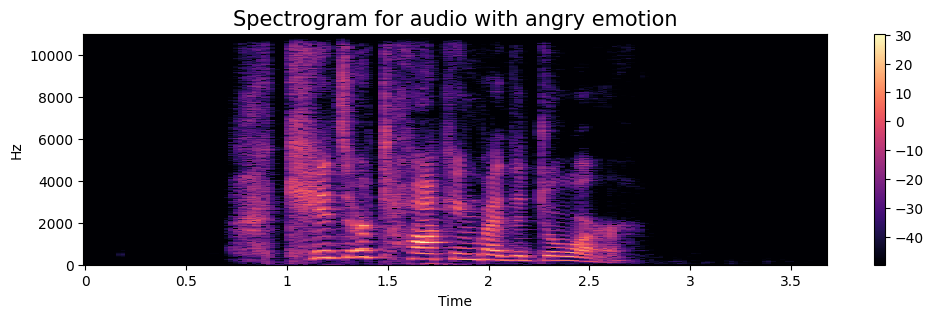

In [60]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

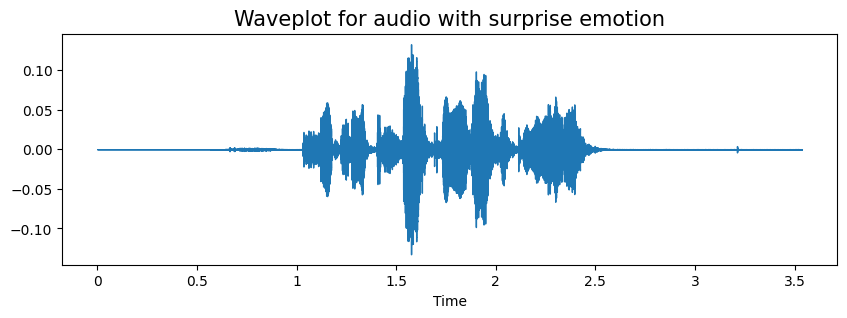

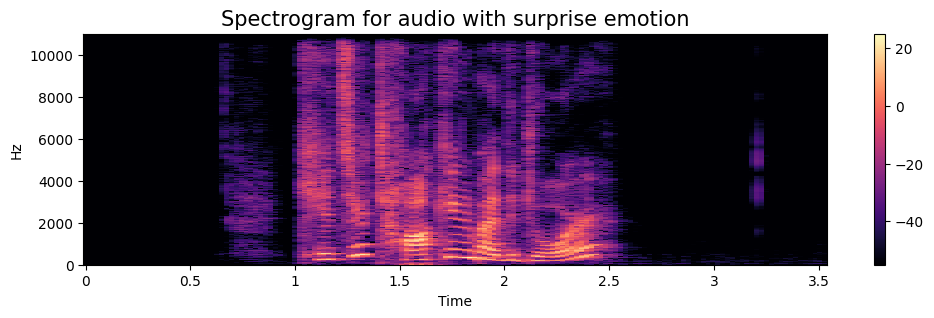

In [61]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion) 
Audio(path)

# Augmentation
Viewing sample transfomations that can be applied on data:
- Adding noise
- Stretching audio
- Apply pitch shift
- Randomly shift audio in time

In [3]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, n_steps=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=n_steps)

In [4]:
# Normal Audio
path = '/kaggle/input/cremad/AudioWAV/1001_DFA_ANG_XX.wav'
data, sr = librosa.load(path)
Audio(path)

In [5]:
noisy_audio = noise(data)
Audio(noisy_audio, rate=sr)

In [8]:
stretched_audio = stretch(data, rate=0.8)
Audio(stretched_audio, rate=sr)

In [9]:
shifted_audio = shift(data)
Audio(shifted_audio, rate=sr)

In [10]:
pitched_audio = pitch(data, sr)
Audio(pitched_audio, rate=sr)

# Feature Extraction
Selected features:
- Zero Crossing Rate
- Root Mean Square Energy
- Mel Frequency Cepstral Coefficients

In [32]:
# Zero Crossing Rate
def zcr(data, frame_length, hop_length):
    data_zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return torch.tensor(data_zcr).squeeze()

# Root Mean Square Energy (RMSE)
def rmse(data, frame_length, hop_length):
    # Calculate RMS using librosa
    data_rms = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return torch.tensor(data_rms).squeeze()

# Mel Frequency Cepstral Coefficients (MFCC)
def mfcc(data,sr,frame_length,hop_length):
    data_mfcc=librosa.feature.mfcc(y=data,sr=sr)
    data_mfcc = np.ravel(data_mfcc.T)
    return torch.tensor(data_mfcc)

# Extract Features (combining all above features)
def extract_features(data, sr, frame_length=2048, hop_length=512):
    zcr_feature = zcr(data, frame_length, hop_length)
    rmse_feature = rmse(data, frame_length, hop_length)
    mfcc_feature = mfcc(data, sr, frame_length, hop_length)
    
    # Concatenate all features into one tensor
    features = torch.cat((zcr_feature, rmse_feature, mfcc_feature), dim=0)
    return features

In [13]:
class AudioDataset(Dataset):
    def __init__(self, df, duration=2.5, offset=0.6, sample_rate=16000):
        self.df = df
        self.paths = df['Path']
        self.labels = df['Emotions']
        self.sample_rate = sample_rate
        self.offset = offset # start the audio at 0.6 seconds to remove silence at beginning
        self.duration = duration # the duration of the audio files to avoid silence at the end
        self.num_samples = int(duration * sample_rate)
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        # Load the audio file
        audio_path = self.paths.iloc[idx]
        label = self.labels.iloc[idx]
        data, _ = librosa.load(path, sr=self.sample_rate, offset=self.offset, duration=self.duration)
        # pad the audio to the required duration
        data = self.pad(data)
        #Apply transformations
        transform = random.choice([self.apply_noise, self.apply_pitch, self.apply_shift])
        transformed_data = transform(data)
        # Extract features
        features = extract_features(transformed_data, sr=self.sample_rate)
        features = features.unsqueeze(0).float()
        return features, label

    def pad(self, data):
        pad_size = int(self.num_samples - len(data))
        data = np.pad(data, (0, pad_size)) if pad_size != 0 else data
        return data
        
    def apply_noise(self, data):
        return noise(data)
    
    def apply_pitch(self, data):
        return pitch(data, self.sample_rate)
    
    def apply_shift(self, data):
        return shift(data)

In [33]:
# Create the dataset
audio_dataset = AudioDataset(data_path, sample_rate=22050)

In [36]:
audio_dataset[0]

(tensor([ 0.2510,  0.3804,  0.5049,  ...,  1.4168, -0.5036,  2.4079],
        dtype=torch.float64),
 7)